In [102]:
import os
import io
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from PIL import Image
from argparse import Namespace
from collections import defaultdict
from env.VRPInstance import VRPInstance
from env.utils import load_scores, sort_instances
from tensorboard.backend.event_processing import event_accumulator

In [110]:
# Baseline
VNS_heuristic_scores = {
   "seed_1_E-n22-k4":	404.38607,
   "seed_1_E-n23-k3":	657.86604,
   "seed_1_E-n30-k3":	680.2619,
   "seed_1_E-n33-k4":	1018.2934,
   "seed_1_E-n51-k5":	504.35586,
   "seed_1_E-n76-k7":	660.60752,
   "seed_1_E-n101-k8":	801.09665,
   "seed_1_X-n143-k7":	16048.131,
   "seed_1_X-n214-k11":	11494.298,
   "seed_1_X-n351-k40":	26361.858,
   "seed_1_X-n459-k26":	25670.166,
   "seed_1_X-n573-k30":	51329.382,
   "seed_1_X-n685-k75":	69908.893,
   "seed_1_X-n749-k98":	78183.008,
   "seed_1_X-n819-k171":	158590.56,
   "seed_1_X-n916-k207":	314891.13,
   "seed_1_X-n1001-k43":	75436.699,
   "seed_2_E-n22-k4":	427.71744,
   "seed_2_E-n23-k3":	641.30423,
   "seed_2_E-n30-k3":	697.12727,
   "seed_2_E-n33-k4":	821.37505,
   "seed_2_E-n51-k5":	534.62073,
   "seed_2_E-n76-k7":	668.77424,
   "seed_2_E-n101-k8":	843.71086,
   "seed_2_X-n143-k7":	15793.836,
   "seed_2_X-n214-k11":	11441.33,
   "seed_2_X-n351-k40":	26414.319,
   "seed_2_X-n459-k26":	24979.544,
   "seed_2_X-n573-k30":	49597.162,
   "seed_2_X-n685-k75":	68382.203,
   "seed_2_X-n749-k98":	77231.227,
   "seed_2_X-n819-k171":	152282.73,
   "seed_2_X-n916-k207":	308447.35,
   "seed_2_X-n1001-k43":	72161.871,
   "seed_3_E-n22-k4":	417.15308,
   "seed_3_E-n23-k3":	688.3345,
   "seed_3_E-n30-k3":	749.31362,
   "seed_3_E-n33-k4":	952.49849,
   "seed_3_E-n51-k5":	532.88203,
   "seed_3_E-n76-k7":	704.424,
   "seed_3_E-n101-k8":	810.83515,
   "seed_3_X-n143-k7":	16274.212,
   "seed_3_X-n214-k11":	11651.702,
   "seed_3_X-n351-k40":	27020.006,
   "seed_3_X-n459-k26":	25324.938,
   "seed_3_X-n573-k30":	51506.479,
   "seed_3_X-n685-k75":	70586.763,
   "seed_3_X-n749-k98":	80663.234,
   "seed_3_X-n819-k171":	163033.72,
   "seed_3_X-n916-k207":	316618.65,
   "seed_3_X-n1001-k43":	76248.316,
   "seed_4_E-n22-k4":	371.83858,
   "seed_4_E-n23-k3":	546.12688,
   "seed_4_E-n30-k3":	797.00532,
   "seed_4_E-n33-k4":	863.37428,
   "seed_4_E-n51-k5":	543.62023,
   "seed_4_E-n76-k7":	677.03116,
   "seed_4_E-n101-k8":	797.86036,
   "seed_4_X-n143-k7":	16870.617,
   "seed_4_X-n214-k11":	11349.707,
   "seed_4_X-n351-k40":	26873.271,
   "seed_4_X-n459-k26":	25465.598,
   "seed_4_X-n573-k30":	52078.971,
   "seed_4_X-n685-k75":	72676.138,
   "seed_4_X-n749-k98":	80445.962,
   "seed_4_X-n819-k171":	163801.29,
   "seed_4_X-n916-k207":	317519.46,
   "seed_4_X-n1001-k43":	76948.161,
   "seed_5_E-n22-k4":	538.66315,
   "seed_5_E-n23-k3":	742.03231,
   "seed_5_E-n30-k3":	689.72479,
   "seed_5_E-n33-k4":	1046.1217,
   "seed_5_E-n51-k5":	531.84885,
   "seed_5_E-n76-k7":	672.1811,
   "seed_5_E-n101-k8":	854.99149,
   "seed_5_X-n143-k7":	17131.559,
   "seed_5_X-n214-k11":	11276.31,
   "seed_5_X-n351-k40":	26269.418,
   "seed_5_X-n459-k26":	25664.788,
   "seed_5_X-n573-k30":	48970.328,
   "seed_5_X-n685-k75":	67818.645,
   "seed_5_X-n749-k98":	79733.68,
   "seed_5_X-n819-k171":	163461.32,
   "seed_5_X-n916-k207":	323274.29,
   "seed_5_X-n1001-k43":	76030.949,
   "seed_6_E-n22-k4":	447.8854,
   "seed_6_E-n23-k3":	622.52337,
   "seed_6_E-n30-k3":	742.39257,
   "seed_6_E-n33-k4":	908.6854,
   "seed_6_E-n51-k5":	527.08042,
   "seed_6_E-n76-k7":	652.11417,
   "seed_6_E-n101-k8":	852.86594,
   "seed_6_X-n143-k7":	15802.464,
   "seed_6_X-n214-k11":	11565.753,
   "seed_6_X-n351-k40":	26132.73,
   "seed_6_X-n459-k26":	25377.249,
   "seed_6_X-n573-k30":	50186.028,
   "seed_6_X-n685-k75":	68745.253,
   "seed_6_X-n749-k98":	75914.158,
   "seed_6_X-n819-k171":	154377.61,
   "seed_6_X-n916-k207":	308193.05,
   "seed_6_X-n1001-k43":	73492.576,
   "seed_7_E-n22-k4":	389.56258,
   "seed_7_E-n23-k3":	713.43729,
   "seed_7_E-n30-k3":	585.24185,
   "seed_7_E-n33-k4":	921.14124,
   "seed_7_E-n51-k5":	546.21402,
   "seed_7_E-n76-k7":	734.85202,
   "seed_7_E-n101-k8":	822.66409,
   "seed_7_X-n143-k7":	16788.646,
   "seed_7_X-n214-k11":	12032.327,
   "seed_7_X-n351-k40":	27932.772,
   "seed_7_X-n459-k26":	26076.079,
   "seed_7_X-n573-k30":	52263.869,
   "seed_7_X-n685-k75":	72448.483,
   "seed_7_X-n749-k98":	80981.313,
   "seed_7_X-n819-k171":	162253.55,
   "seed_7_X-n916-k207":	324191.59,
   "seed_7_X-n1001-k43":	77972.769,
   "seed_8_E-n22-k4":	452.96362,
   "seed_8_E-n23-k3":	593.33513,
   "seed_8_E-n30-k3":	599.37469,
   "seed_8_E-n33-k4":	1035.2395,
   "seed_8_E-n51-k5":	513.6146,
   "seed_8_E-n76-k7":	674.05654,
   "seed_8_E-n101-k8":	833.89445,
   "seed_8_X-n143-k7":	16225.828,
   "seed_8_X-n214-k11":	11488.821,
   "seed_8_X-n351-k40":	26827.423,
   "seed_8_X-n459-k26":	25566.724,
   "seed_8_X-n573-k30":	51465.73,
   "seed_8_X-n685-k75":	71232.682,
   "seed_8_X-n749-k98":	79898.76,
   "seed_8_X-n819-k171":	162725.99,
   "seed_8_X-n916-k207":	316110.85,
   "seed_8_X-n1001-k43":	76851.828,
   "seed_9_E-n22-k4":	428.00318,
   "seed_9_E-n23-k3":	643.83623,
   "seed_9_E-n30-k3":	803.49921,
   "seed_9_E-n33-k4":	1029.7748,
   "seed_9_E-n51-k5":	531.38575,
   "seed_9_E-n76-k7":	676.65357,
   "seed_9_E-n101-k8":	813.31779,
   "seed_9_X-n143-k7":	16848.276,
   "seed_9_X-n214-k11":	11418.18,
   "seed_9_X-n351-k40":	26459.247,
   "seed_9_X-n459-k26":	25959.738,
   "seed_9_X-n573-k30":	50531.681,
   "seed_9_X-n685-k75":	70231.954,
   "seed_9_X-n749-k98":	78454.214,
   "seed_9_X-n819-k171":	155251.04,
   "seed_9_X-n916-k207":	333699.03,
   "seed_9_X-n1001-k43":	78278.67,
   "seed_10_E-n22-k4":	445.11902,
   "seed_10_E-n23-k3":	634.4876,
   "seed_10_E-n30-k3":	782.35751,
   "seed_10_E-n33-k4":	1107.9428,
   "seed_10_E-n51-k5":	545.36961,
   "seed_10_E-n76-k7":	709.22359,
   "seed_10_E-n101-k8":	812.01341,
   "seed_10_X-n143-k7":	16605.774,
   "seed_10_X-n214-k11":	11755.492,
   "seed_10_X-n351-k40":	26365.971,
   "seed_10_X-n459-k26":	26068.268,
   "seed_10_X-n573-k30":	49641.286,
   "seed_10_X-n685-k75":	68586.458,
   "seed_10_X-n749-k98":	77507.903,
   "seed_10_X-n819-k171":	153027.3,
   "seed_10_X-n916-k207":	324252.56,
   "seed_10_X-n1001-k43":	76684.472,
   "seed_11_E-n22-k4":	494.70945,
   "seed_11_E-n23-k3":	698.35698,
   "seed_11_E-n30-k3":	751.75403,
   "seed_11_E-n33-k4":	1027.7443,
   "seed_11_E-n51-k5":	531.21569,
   "seed_11_E-n76-k7":	699.27415,
   "seed_11_E-n101-k8":	802.98914,
   "seed_11_X-n143-k7":	16533.146,
   "seed_11_X-n214-k11":	11370.72,
   "seed_11_X-n351-k40":	26807.197,
   "seed_11_X-n459-k26":	26105.574,
   "seed_11_X-n573-k30":	50921.893,
   "seed_11_X-n685-k75":	70768.898,
   "seed_11_X-n749-k98":	79392.45,
   "seed_11_X-n819-k171":	155790.27,
   "seed_11_X-n916-k207":	331662.98,
   "seed_11_X-n1001-k43":	77867.272,
   "seed_12_E-n22-k4":	444.36053,
   "seed_12_E-n23-k3":	640.93888,
   "seed_12_E-n30-k3":	690.2645,
   "seed_12_E-n33-k4":	978.83524,
   "seed_12_E-n51-k5":	527.18498,
   "seed_12_E-n76-k7":	708.14872,
   "seed_12_E-n101-k8":	847.80449,
   "seed_12_X-n143-k7":	16989.9,
   "seed_12_X-n214-k11":	11738.357,
   "seed_12_X-n351-k40":	26989.12,
   "seed_12_X-n459-k26":	25980.501,
   "seed_12_X-n573-k30":	51704.243,
   "seed_12_X-n685-k75":	70198.557,
   "seed_12_X-n749-k98":	78503.261,
   "seed_12_X-n819-k171":	154865.13,
   "seed_12_X-n916-k207":	332856.49,
   "seed_12_X-n1001-k43":	77408.333,
   "seed_13_E-n22-k4":	486.56508,
   "seed_13_E-n23-k3":	669.47919,
   "seed_13_E-n30-k3":	714.91335,
   "seed_13_E-n33-k4":	958.19855,
   "seed_13_E-n51-k5":	569.99452,
   "seed_13_E-n76-k7":	721.86924,
   "seed_13_E-n101-k8":	839.08524,
   "seed_13_X-n143-k7":	16584.936,
   "seed_13_X-n214-k11":	11915.772,
   "seed_13_X-n351-k40":	27728.65,
   "seed_13_X-n459-k26":	25624.503,
   "seed_13_X-n573-k30":	53062.373,
   "seed_13_X-n685-k75":	71273.075,
   "seed_13_X-n749-k98":	81128.65,
   "seed_13_X-n819-k171":	163965.68,
   "seed_13_X-n916-k207":	324552.25,
   "seed_13_X-n1001-k43":	76742.403,
   "seed_14_E-n22-k4":	478.13914,
   "seed_14_E-n23-k3":	747.11642,
   "seed_14_E-n30-k3":	676.42647,
   "seed_14_E-n33-k4":	916.83644,
   "seed_14_E-n51-k5":	553.20437,
   "seed_14_E-n76-k7":	683.72883,
   "seed_14_E-n101-k8":	796.80768,
   "seed_14_X-n143-k7":	16065.555,
   "seed_14_X-n214-k11":	11334.501,
   "seed_14_X-n351-k40":	26057.798,
   "seed_14_X-n459-k26":	24797.013,
   "seed_14_X-n573-k30":	50142.044,
   "seed_14_X-n685-k75":	68669.972,
   "seed_14_X-n749-k98":	77354.116,
   "seed_14_X-n819-k171":	157226.71,
   "seed_14_X-n916-k207":	307166.96,
   "seed_14_X-n1001-k43":	73917.52,
}

In [118]:
instance_keys = sort_instances(list(set([x.split("_", 2)[-1] + ".evrp" for x in VNS_heuristic_scores.keys()])))

In [104]:
def compute_gap(scores):
    gaps = []
    for name, score in scores.items():
        baseline_score = VNS_heuristic_scores[name]
        gap = (baseline_score - score) / baseline_score
        gaps.append(gap)
    average_gap = np.mean(gaps)
    return average_gap

In [105]:
def read_tensorboard_event(folder):
    for file in os.listdir(folder):
        if "events" in file:
            event = event_accumulator.EventAccumulator(os.path.join(folder, file))
            event.Reload()
            return event

In [120]:
def load_all_scores(log_folders):
    data = defaultdict(list)
    for folder in log_folders:
        data["Folder"].append(folder)
        event = read_tensorboard_event(folder)
        steps = event.Scalars("steps")
        running_time = steps[-1].wall_time - steps[0].wall_time
        for key in instance_keys:
            scores = [x.value for x in event.Scalars(f"scores/{key}")]
            data[key].append(scores)
        data["Running Time"].append(round(running_time, 2))
    df = pd.DataFrame(data).set_index(["Folder", "Running Time"])
    return df

In [107]:
def plotly_fig2array(fig):
    fig_bytes = fig.to_image(format="png")
    buf = io.BytesIO(fig_bytes)
    img = Image.open(buf)
    return np.asarray(img)

In [217]:
def instance_fig(df, key):
    best_folder, _ = df[key].idxmin()
    seed = best_folder.split("/")[-1]
    data = load_scores(best_folder)[key]
    solution = data.solution
    args = Namespace(round_int=False, algo=None)
    instance = VRPInstance.from_path(f"dataset/test/data_evrp_random/{seed}/{key}", args, f"sub_{key}")
    instance.solution = solution
    fig = instance.plot()
    return fig, data.score, seed

In [121]:
print("HGS (lambda=0.1) scores:")
vrp_hgs_df = load_all_scores([f"logs/dataset_test_data_evrp_random_seed_{x}_HGS_0.1/seed_{x}" for x in range(1, 15)])
vrp_hgs_best_score = vrp_hgs_df.applymap(lambda x: min(x))
vrp_hgs_best_score.round(2)

HGS (lambda=0.1) scores:


E-n22-k4.evrp  \
Folder                                             Running Time                  
logs/dataset_test_data_evrp_random_seed_1_HGS_0... 4392.76              407.36   
logs/dataset_test_data_evrp_random_seed_2_HGS_0... 4471.00              439.97   
logs/dataset_test_data_evrp_random_seed_3_HGS_0... 4474.29              431.65   
logs/dataset_test_data_evrp_random_seed_4_HGS_0... 4508.70              375.79   
logs/dataset_test_data_evrp_random_seed_5_HGS_0... 4512.13              545.19   
logs/dataset_test_data_evrp_random_seed_6_HGS_0... 4438.92              450.20   
logs/dataset_test_data_evrp_random_seed_7_HGS_0... 4509.50              398.37   
logs/dataset_test_data_evrp_random_seed_8_HGS_0... 4391.60              464.88   
logs/dataset_test_data_evrp_random_seed_9_HGS_0... 4521.17              420.33   
logs/dataset_test_data_evrp_random_seed_10_HGS_... 4337.32              471.23   
logs/dataset_test_data_evrp_random_seed_11_HGS_... 4361.61              502.48   
logs/dataset_test_data_evrp_random_seed_12_HGS_... 4437.46              444.36   
logs/dataset_test_data_evrp_random_seed_13_HGS_... 2603.19              495.74   
logs/dataset_test_data_evrp_random_seed_14_HGS_... 2678.49              489.11   

                                                                 E-n23-k3.evrp  \
Folder                                             Running Time                  
logs/dataset_test_data_evrp_random_seed_1_HGS_0... 4392.76              661.86   
logs/dataset_test_data_evrp_random_seed_2_HGS_0... 4471.00              648.29   
logs/dataset_test_data_evrp_random_seed_3_HGS_0... 4474.29              739.23   
logs/dataset_test_data_evrp_random_seed_4_HGS_0... 4508.70              547.04   
logs/dataset_test_data_evrp_random_seed_5_HGS_0... 4512.13              742.03   
logs/dataset_test_data_evrp_random_seed_6_HGS_0... 4438.92              622.52   
logs/dataset_test_data_evrp_random_seed_7_HGS_0... 4509.50              716.23   
logs/dataset_test_data_evrp_random_seed_8_HGS_0... 4391.60              593.34   
logs/dataset_test_data_evrp_random_seed_9_HGS_0... 4521.17              643.84   
logs/dataset_test_data_evrp_random_seed_10_HGS_... 4337.32              664.89   
logs/dataset_test_data_evrp_random_seed_11_HGS_... 4361.61              698.36   
logs/dataset_test_data_evrp_random_seed_12_HGS_... 4437.46              659.43   
logs/dataset_test_data_evrp_random_seed_13_HGS_... 2603.19              677.47   
logs/dataset_test_data_evrp_random_seed_14_HGS_... 2678.49              752.41   

                                                                 E-n30-k3.evrp  \
Folder                                             Running Time                  
logs/dataset_test_data_evrp_random_seed_1_HGS_0... 4392.76              680.26   
logs/dataset_test_data_evrp_random_seed_2_HGS_0... 4471.00              697.13   
logs/dataset_test_data_evrp_random_seed_3_HGS_0... 4474.29              751.05   
logs/dataset_test_data_evrp_random_seed_4_HGS_0... 4508.70              797.63   
logs/dataset_test_data_evrp_random_seed_5_HGS_0... 4512.13              695.31   
logs/dataset_test_data_evrp_random_seed_6_HGS_0... 4438.92              755.41   
logs/dataset_test_data_evrp_random_seed_7_HGS_0... 4509.50              589.63   
logs/dataset_test_data_evrp_random_seed_8_HGS_0... 4391.60              614.88   
logs/dataset_test_data_evrp_random_seed_9_HGS_0... 4521.17              808.49   
logs/dataset_test_data_evrp_random_seed_10_HGS_... 4337.32              832.61   
logs/dataset_test_data_evrp_random_seed_11_HGS_... 4361.61              764.71   
logs/dataset_test_data_evrp_random_seed_12_HGS_... 4437.46              690.26   
logs/dataset_test_data_evrp_random_seed_13_HGS_... 2603.19              717.14   
logs/dataset_test_data_evrp_random_seed_14_HGS_... 2678.49              685.80   

                                                                 E-n33-k4.evrp  \
Folder                                      

In [122]:
print("HGS (lambda=0.1) scores:")
vrp_hgs_overall = vrp_hgs_best_score.apply(lambda x: [min(x), max(x), np.mean(x), np.std(x)])
vrp_hgs_overall.index = ["Min", "Max", "Mean", "Std."]
vrp_hgs_overall

HGS (lambda=0.1) scores:


E-n22-k4.evrp  E-n23-k3.evrp  E-n30-k3.evrp  E-n33-k4.evrp  \
Min      375.794281     547.044006     589.631592     825.606506   
Max      545.194702     752.408325     832.606506    1106.893433   
Mean     452.619692     669.066546     720.022544     971.199554   
Std.      44.202939      56.294836      67.387550      75.775674   

      E-n51-k5.evrp  E-n76-k7.evrp  E-n101-k8.evrp  X-n143-k7.evrp  \
Min      504.355865     649.361511      774.646118    15468.402344   
Max      553.204346     722.482849      835.156860    16259.410156   
Mean     533.128289     676.125052      803.617161    15864.601632   
Std.      13.913577      20.913284       20.153434      217.923822   

      X-n214-k11.evrp  X-n351-k40.evrp  X-n459-k26.evrp  X-n573-k30.evrp  \
Min      10783.025391     25101.835938     23784.769531     48077.039062   
Max      11371.105469     26769.494141     25166.134766     51577.472656   
Mean     11065.223842     25687.945173     24494.438616     49580.556362   
Std.       166.802849       475.182683       418.292243       940.777663   

      X-n685-k75.evrp  X-n749-k98.evrp  X-n819-k171.evrp  X-n916-k207.evrp  \
Min      65127.933594     73445.132812     148322.703125     300018.312500   
Max      69797.695312     78595.015625     158922.203125     326914.812500   
Mean     67314.966239     76379.024554     153917.184152     313344.790179   
Std.      1472.063387      1648.461502       4038.680051       8642.510563   

      X-n1001-k43.evrp  
Min       69595.265625  
Max       74459.210938  
Mean      72317.250000  
Std.       1489.949719

In [123]:
print("HGS (lambda=0.0) scores:")
vrp_hgs_no_imitation_df = load_all_scores([f"logs/dataset_test_data_evrp_random_seed_{x}_HGS_0.0/seed_{x}" for x in range(1, 15)])
vrp_hgs_no_imitation_best_score = vrp_hgs_no_imitation_df.applymap(lambda x: min(x))
vrp_hgs_no_imitation_best_score.round(2)

HGS (lambda=0.0) scores:


E-n22-k4.evrp  \
Folder                                             Running Time                  
logs/dataset_test_data_evrp_random_seed_1_HGS_0... 2118.85              407.36   
logs/dataset_test_data_evrp_random_seed_2_HGS_0... 2220.48              439.97   
logs/dataset_test_data_evrp_random_seed_3_HGS_0... 2075.42              431.65   
logs/dataset_test_data_evrp_random_seed_4_HGS_0... 2063.00              375.79   
logs/dataset_test_data_evrp_random_seed_5_HGS_0... 2187.54              545.19   
logs/dataset_test_data_evrp_random_seed_6_HGS_0... 2015.43              450.20   
logs/dataset_test_data_evrp_random_seed_7_HGS_0... 2119.20              398.37   
logs/dataset_test_data_evrp_random_seed_8_HGS_0... 2114.66              464.88   
logs/dataset_test_data_evrp_random_seed_9_HGS_0... 2112.08              420.33   
logs/dataset_test_data_evrp_random_seed_10_HGS_... 2091.74              471.23   
logs/dataset_test_data_evrp_random_seed_11_HGS_... 2020.89              502.48   
logs/dataset_test_data_evrp_random_seed_12_HGS_... 2096.62              444.36   
logs/dataset_test_data_evrp_random_seed_13_HGS_... 1580.80              486.57   
logs/dataset_test_data_evrp_random_seed_14_HGS_... 1685.28              489.11   

                                                                 E-n23-k3.evrp  \
Folder                                             Running Time                  
logs/dataset_test_data_evrp_random_seed_1_HGS_0... 2118.85              661.86   
logs/dataset_test_data_evrp_random_seed_2_HGS_0... 2220.48              648.29   
logs/dataset_test_data_evrp_random_seed_3_HGS_0... 2075.42              739.23   
logs/dataset_test_data_evrp_random_seed_4_HGS_0... 2063.00              547.04   
logs/dataset_test_data_evrp_random_seed_5_HGS_0... 2187.54              742.03   
logs/dataset_test_data_evrp_random_seed_6_HGS_0... 2015.43              622.52   
logs/dataset_test_data_evrp_random_seed_7_HGS_0... 2119.20              716.23   
logs/dataset_test_data_evrp_random_seed_8_HGS_0... 2114.66              593.34   
logs/dataset_test_data_evrp_random_seed_9_HGS_0... 2112.08              643.84   
logs/dataset_test_data_evrp_random_seed_10_HGS_... 2091.74              664.89   
logs/dataset_test_data_evrp_random_seed_11_HGS_... 2020.89              698.36   
logs/dataset_test_data_evrp_random_seed_12_HGS_... 2096.62              659.43   
logs/dataset_test_data_evrp_random_seed_13_HGS_... 1580.80              677.47   
logs/dataset_test_data_evrp_random_seed_14_HGS_... 1685.28              752.41   

                                                                 E-n30-k3.evrp  \
Folder                                             Running Time                  
logs/dataset_test_data_evrp_random_seed_1_HGS_0... 2118.85              680.26   
logs/dataset_test_data_evrp_random_seed_2_HGS_0... 2220.48              697.13   
logs/dataset_test_data_evrp_random_seed_3_HGS_0... 2075.42              751.05   
logs/dataset_test_data_evrp_random_seed_4_HGS_0... 2063.00              797.63   
logs/dataset_test_data_evrp_random_seed_5_HGS_0... 2187.54              695.31   
logs/dataset_test_data_evrp_random_seed_6_HGS_0... 2015.43              755.41   
logs/dataset_test_data_evrp_random_seed_7_HGS_0... 2119.20              589.63   
logs/dataset_test_data_evrp_random_seed_8_HGS_0... 2114.66              614.88   
logs/dataset_test_data_evrp_random_seed_9_HGS_0... 2112.08              803.50   
logs/dataset_test_data_evrp_random_seed_10_HGS_... 2091.74              832.61   
logs/dataset_test_data_evrp_random_seed_11_HGS_... 2020.89              764.71   
logs/dataset_test_data_evrp_random_seed_12_HGS_... 2096.62              690.26   
logs/dataset_test_data_evrp_random_seed_13_HGS_... 1580.80              717.14   
logs/dataset_test_data_evrp_random_seed_14_HGS_... 1685.28              685.80   

                                                                 E-n33-k4.evrp  \
Folder                                      

In [124]:
print("HGS (lambda=0.0) scores")
vrp_hgs_no_imitation_overall = vrp_hgs_no_imitation_best_score.apply(lambda x: [min(x), max(x), np.mean(x), np.std(x)])
vrp_hgs_no_imitation_overall.index = ["Min", "Max", "Mean", "Std."]
vrp_hgs_no_imitation_overall

HGS (lambda=0.0) scores


E-n22-k4.evrp  E-n23-k3.evrp  E-n30-k3.evrp  E-n33-k4.evrp  \
Min      375.794281     547.044006     589.631592     825.606506   
Max      545.194702     752.408325     832.606506    1106.893433   
Mean     451.964220     669.066546     719.665758     971.199554   
Std.      43.622868      56.294836      66.929859      75.775674   

      E-n51-k5.evrp  E-n76-k7.evrp  E-n101-k8.evrp  X-n143-k7.evrp  \
Min      504.355865     649.361511      774.773315    15468.402344   
Max      562.599915     722.482849      835.027100    16232.834961   
Mean     533.799401     676.113935      804.024266    15866.946150   
Std.      15.046238      20.989051       20.131379      210.506312   

      X-n214-k11.evrp  X-n351-k40.evrp  X-n459-k26.evrp  X-n573-k30.evrp  \
Min      10791.659180     25069.373047     23801.593750     48141.996094   
Max      11395.358398     26780.925781     25207.832031     51677.015625   
Mean     11067.385742     25729.330357     24529.101702     49718.283761   
Std.       170.529912       490.587035       421.690547       980.086102   

      X-n685-k75.evrp  X-n749-k98.evrp  X-n819-k171.evrp  X-n916-k207.evrp  \
Min      65307.417969     73398.992188     148592.078125     299216.093750   
Max      69858.710938     78676.835938     159134.875000     326386.906250   
Mean     67414.183315     76484.157924     154121.190848     312766.404018   
Std.      1442.577314      1656.865899       4101.650989       8625.885513   

      X-n1001-k43.evrp  
Min       69609.898438  
Max       74517.648438  
Mean      72328.126674  
Std.       1475.429545

In [125]:
print("VNS (lambda=0.1) scores:")
vrp_vns_df = load_all_scores([f"logs/dataset_test_data_evrp_random_seed_{x}_VNS_0.1/seed_{x}" for x in range(1, 15)])
vrp_vns_best_score = vrp_vns_df.applymap(lambda x: min(x))
vrp_vns_best_score.round(2)

VNS (lambda=0.1) scores:


E-n22-k4.evrp  \
Folder                                             Running Time                  
logs/dataset_test_data_evrp_random_seed_1_VNS_0... 5939.19              404.39   
logs/dataset_test_data_evrp_random_seed_2_VNS_0... 5865.76              427.72   
logs/dataset_test_data_evrp_random_seed_3_VNS_0... 6020.53              417.15   
logs/dataset_test_data_evrp_random_seed_4_VNS_0... 5907.07              371.84   
logs/dataset_test_data_evrp_random_seed_5_VNS_0... 6292.51              538.66   
logs/dataset_test_data_evrp_random_seed_6_VNS_0... 5986.07              447.89   
logs/dataset_test_data_evrp_random_seed_7_VNS_0... 5979.41              389.56   
logs/dataset_test_data_evrp_random_seed_8_VNS_0... 5526.00              450.39   
logs/dataset_test_data_evrp_random_seed_9_VNS_0... 5911.39              420.33   
logs/dataset_test_data_evrp_random_seed_10_VNS_... 5479.54              445.12   
logs/dataset_test_data_evrp_random_seed_11_VNS_... 6036.66              493.12   
logs/dataset_test_data_evrp_random_seed_12_VNS_... 5391.55              444.36   
logs/dataset_test_data_evrp_random_seed_13_VNS_... 3265.01              486.57   
logs/dataset_test_data_evrp_random_seed_14_VNS_... 3362.63              471.72   

                                                                 E-n23-k3.evrp  \
Folder                                             Running Time                  
logs/dataset_test_data_evrp_random_seed_1_VNS_0... 5939.19              657.87   
logs/dataset_test_data_evrp_random_seed_2_VNS_0... 5865.76              641.30   
logs/dataset_test_data_evrp_random_seed_3_VNS_0... 6020.53              688.33   
logs/dataset_test_data_evrp_random_seed_4_VNS_0... 5907.07              546.13   
logs/dataset_test_data_evrp_random_seed_5_VNS_0... 6292.51              742.03   
logs/dataset_test_data_evrp_random_seed_6_VNS_0... 5986.07              622.52   
logs/dataset_test_data_evrp_random_seed_7_VNS_0... 5979.41              713.44   
logs/dataset_test_data_evrp_random_seed_8_VNS_0... 5526.00              593.34   
logs/dataset_test_data_evrp_random_seed_9_VNS_0... 5911.39              643.84   
logs/dataset_test_data_evrp_random_seed_10_VNS_... 5479.54              634.49   
logs/dataset_test_data_evrp_random_seed_11_VNS_... 6036.66              698.36   
logs/dataset_test_data_evrp_random_seed_12_VNS_... 5391.55              640.94   
logs/dataset_test_data_evrp_random_seed_13_VNS_... 3265.01              669.48   
logs/dataset_test_data_evrp_random_seed_14_VNS_... 3362.63              747.12   

                                                                 E-n30-k3.evrp  \
Folder                                             Running Time                  
logs/dataset_test_data_evrp_random_seed_1_VNS_0... 5939.19              680.26   
logs/dataset_test_data_evrp_random_seed_2_VNS_0... 5865.76              697.13   
logs/dataset_test_data_evrp_random_seed_3_VNS_0... 6020.53              749.31   
logs/dataset_test_data_evrp_random_seed_4_VNS_0... 5907.07              790.17   
logs/dataset_test_data_evrp_random_seed_5_VNS_0... 6292.51              689.72   
logs/dataset_test_data_evrp_random_seed_6_VNS_0... 5986.07              742.39   
logs/dataset_test_data_evrp_random_seed_7_VNS_0... 5979.41              585.24   
logs/dataset_test_data_evrp_random_seed_8_VNS_0... 5526.00              599.37   
logs/dataset_test_data_evrp_random_seed_9_VNS_0... 5911.39              799.72   
logs/dataset_test_data_evrp_random_seed_10_VNS_... 5479.54              761.75   
logs/dataset_test_data_evrp_random_seed_11_VNS_... 6036.66              751.75   
logs/dataset_test_data_evrp_random_seed_12_VNS_... 5391.55              690.26   
logs/dataset_test_data_evrp_random_seed_13_VNS_... 3265.01              714.91   
logs/dataset_test_data_evrp_random_seed_14_VNS_... 3362.63              676.43   

                                                                 E-n33-k4.evrp  \
Folder                                      

In [126]:
print("VNS (lambda=0.1) scores")
vrp_vns_overall = vrp_vns_best_score.apply(lambda x: [min(x), max(x), np.mean(x), np.std(x)])
vrp_vns_overall.index = ["Min", "Max", "Mean", "Std."]
vrp_vns_overall

VNS (lambda=0.1) scores


E-n22-k4.evrp  E-n23-k3.evrp  E-n30-k3.evrp  E-n33-k4.evrp  \
Min      371.838593     546.126892     585.241821     821.973694   
Max      538.663147     747.116394     799.716431    1106.893433   
Mean     443.486112     659.941079     709.173253     966.967403   
Std.      42.505400      53.441130      61.112683      75.713198   

      E-n51-k5.evrp  E-n76-k7.evrp  E-n101-k8.evrp  X-n143-k7.evrp  \
Min      504.355865     654.232727      776.095154    15536.642578   
Max      553.204346     726.977295      841.205322    16396.796875   
Mean     532.758307     680.561855      811.114663    16099.116002   
Std.      13.371977      21.314968       19.662557      213.646705   

      X-n214-k11.evrp  X-n351-k40.evrp  X-n459-k26.evrp  X-n573-k30.evrp  \
Min      11066.588867     25470.623047     24167.910156     48377.910156   
Max      11644.689453     27263.300781     25810.675781     52075.738281   
Mean     11267.539969     26231.747070     25111.020787     50248.417690   
Std.       165.689995       478.271370       445.805751      1075.768129   

      X-n685-k75.evrp  X-n749-k98.evrp  X-n819-k171.evrp  X-n916-k207.evrp  \
Min      66146.734375     74602.609375     150430.265625     301285.093750   
Max      71199.820312     79594.648438     161405.968750     329827.625000   
Mean     68559.870536     77551.342634     156261.716518     315090.662946   
Std.      1473.977540      1484.310377       4197.828987       8790.495126   

      X-n1001-k43.evrp  
Min       71091.398438  
Max       77545.921875  
Mean      74567.238281  
Std.       1713.049025

In [127]:
print("VNS (lambda=0.0) scores")
vrp_vns_no_imitation_df = load_all_scores([f"logs/dataset_test_data_evrp_random_seed_{x}_VNS_0.0/seed_{x}" for x in range(1, 15)])
vrp_vns_no_imitation_best_score = vrp_vns_no_imitation_df.applymap(lambda x: min(x))
vrp_vns_no_imitation_best_score.round(2)

VNS (lambda=0.0) scores


E-n22-k4.evrp  \
Folder                                             Running Time                  
logs/dataset_test_data_evrp_random_seed_1_VNS_0... 3430.78              404.39   
logs/dataset_test_data_evrp_random_seed_2_VNS_0... 3375.47              427.72   
logs/dataset_test_data_evrp_random_seed_3_VNS_0... 3329.89              417.15   
logs/dataset_test_data_evrp_random_seed_4_VNS_0... 3353.76              371.84   
logs/dataset_test_data_evrp_random_seed_5_VNS_0... 3465.30              538.66   
logs/dataset_test_data_evrp_random_seed_6_VNS_0... 3288.38              447.89   
logs/dataset_test_data_evrp_random_seed_7_VNS_0... 3309.59              387.45   
logs/dataset_test_data_evrp_random_seed_8_VNS_0... 3038.67              450.39   
logs/dataset_test_data_evrp_random_seed_9_VNS_0... 3310.18              420.33   
logs/dataset_test_data_evrp_random_seed_10_VNS_... 3025.84              445.12   
logs/dataset_test_data_evrp_random_seed_11_VNS_... 3242.21              493.12   
logs/dataset_test_data_evrp_random_seed_12_VNS_... 3054.75              444.36   
logs/dataset_test_data_evrp_random_seed_13_VNS_... 2748.55              486.57   
logs/dataset_test_data_evrp_random_seed_14_VNS_... 2655.59              471.72   

                                                                 E-n23-k3.evrp  \
Folder                                             Running Time                  
logs/dataset_test_data_evrp_random_seed_1_VNS_0... 3430.78              657.87   
logs/dataset_test_data_evrp_random_seed_2_VNS_0... 3375.47              641.30   
logs/dataset_test_data_evrp_random_seed_3_VNS_0... 3329.89              688.33   
logs/dataset_test_data_evrp_random_seed_4_VNS_0... 3353.76              546.13   
logs/dataset_test_data_evrp_random_seed_5_VNS_0... 3465.30              742.03   
logs/dataset_test_data_evrp_random_seed_6_VNS_0... 3288.38              622.52   
logs/dataset_test_data_evrp_random_seed_7_VNS_0... 3309.59              713.44   
logs/dataset_test_data_evrp_random_seed_8_VNS_0... 3038.67              593.34   
logs/dataset_test_data_evrp_random_seed_9_VNS_0... 3310.18              643.84   
logs/dataset_test_data_evrp_random_seed_10_VNS_... 3025.84              634.49   
logs/dataset_test_data_evrp_random_seed_11_VNS_... 3242.21              698.36   
logs/dataset_test_data_evrp_random_seed_12_VNS_... 3054.75              640.94   
logs/dataset_test_data_evrp_random_seed_13_VNS_... 2748.55              669.48   
logs/dataset_test_data_evrp_random_seed_14_VNS_... 2655.59              747.12   

                                                                 E-n30-k3.evrp  \
Folder                                             Running Time                  
logs/dataset_test_data_evrp_random_seed_1_VNS_0... 3430.78              680.26   
logs/dataset_test_data_evrp_random_seed_2_VNS_0... 3375.47              697.13   
logs/dataset_test_data_evrp_random_seed_3_VNS_0... 3329.89              749.31   
logs/dataset_test_data_evrp_random_seed_4_VNS_0... 3353.76              790.17   
logs/dataset_test_data_evrp_random_seed_5_VNS_0... 3465.30              689.72   
logs/dataset_test_data_evrp_random_seed_6_VNS_0... 3288.38              742.39   
logs/dataset_test_data_evrp_random_seed_7_VNS_0... 3309.59              585.24   
logs/dataset_test_data_evrp_random_seed_8_VNS_0... 3038.67              599.37   
logs/dataset_test_data_evrp_random_seed_9_VNS_0... 3310.18              799.72   
logs/dataset_test_data_evrp_random_seed_10_VNS_... 3025.84              761.75   
logs/dataset_test_data_evrp_random_seed_11_VNS_... 3242.21              751.75   
logs/dataset_test_data_evrp_random_seed_12_VNS_... 3054.75              690.26   
logs/dataset_test_data_evrp_random_seed_13_VNS_... 2748.55              714.91   
logs/dataset_test_data_evrp_random_seed_14_VNS_... 2655.59              676.43   

                                                                 E-n33-k4.evrp  \
Folder                                      

In [128]:
print("VNS (lambda=0.0) scores")
vrp_vns_no_imitation_overall = vrp_vns_no_imitation_best_score.apply(lambda x: [min(x), max(x), np.mean(x), np.std(x)])
vrp_vns_no_imitation_overall.index = ["Min", "Max", "Mean", "Std."]
vrp_vns_no_imitation_overall

VNS (lambda=0.0) scores


E-n22-k4.evrp  E-n23-k3.evrp  E-n30-k3.evrp  E-n33-k4.evrp  \
Min      371.838593     546.126892     585.241821     818.517639   
Max      538.663147     747.116394     799.716431    1106.893433   
Mean     443.335240     659.941079     709.173253     966.026149   
Std.      42.699837      53.441130      61.112683      75.733062   

      E-n51-k5.evrp  E-n76-k7.evrp  E-n101-k8.evrp  X-n143-k7.evrp  \
Min      504.355865     652.215881      778.404114    15542.227539   
Max      551.930481     722.482849      835.787842    16366.043945   
Mean     532.427144     677.031865      806.993661    16079.519810   
Std.      13.258412      20.417958       19.820289      230.749998   

      X-n214-k11.evrp  X-n351-k40.evrp  X-n459-k26.evrp  X-n573-k30.evrp  \
Min      10942.438477     25545.900391     24399.414062     48496.246094   
Max      11551.129883     27329.267578     25769.597656     52138.492188   
Mean     11289.036691     26305.091239     25169.789342     50211.600725   
Std.       189.599630       479.428248       423.420297      1056.209838   

      X-n685-k75.evrp  X-n749-k98.evrp  X-n819-k171.evrp  X-n916-k207.evrp  \
Min      66580.500000     74936.078125     150596.937500     302420.593750   
Max      71249.039062     80065.328125     161962.578125     329422.593750   
Mean     68747.097098     77800.111607     156649.872768     316016.200893   
Std.      1383.092761      1583.436720       4186.306145       8636.279616   

      X-n1001-k43.evrp  
Min       71629.046875  
Max       77057.125000  
Mean      74707.352679  
Std.       1540.743998

In [129]:
hgs_running_time = np.mean(vrp_hgs_df.index.get_level_values("Running Time"))/3600
hgs_no_imitation_running_time = np.mean(vrp_hgs_no_imitation_df.index.get_level_values("Running Time"))/3600
vns_running_time = np.mean(vrp_vns_df.index.get_level_values("Running Time"))/3600
vns_no_imitation_running_time = np.mean(vrp_vns_no_imitation_df.index.get_level_values("Running Time"))/3600
print(f"HGS (lambda=0.1) running time = {hgs_running_time:.2f}h")
print(f"HGS (lambda=0.0) running time = {hgs_no_imitation_running_time:.2f}h")
print(f"VNS (lambda=0.1) running time = {vns_running_time:.2f}h")
print(f"VNS (lambda=0.0) running time = {vns_no_imitation_running_time:.2f}h")

HGS (lambda=0.1) running time = 1.16h
HGS (lambda=0.0) running time = 0.57h
VNS (lambda=0.1) running time = 1.53h
VNS (lambda=0.0) running time = 0.89h


In [204]:
def get_gap_df(df, name, running_time):
    results = defaultdict(list)
    n = max(df.applymap(lambda x: len(x)).max())
    for i in range(n):
        score_df = df.applymap(lambda x: min(x[:i+1]))
        data = {}
        for index, row in score_df.iterrows():
            seed = index[0].split("/")[-1]
            row.index = [seed + "_" + x.split(".evrp")[0] for x in row.keys()]
            data.update(row)
        gap = compute_gap(data)
        results[name].append(gap)
        results["Running Time"].append((i+1)*running_time/n)
    results = pd.DataFrame(results)
    return results

In [205]:
hgs_gap = get_gap_df(vrp_hgs_df, "HGS gap", hgs_running_time)
hgs_no_imitation_gap = get_gap_df(vrp_hgs_no_imitation_df, "HGS gap", hgs_no_imitation_running_time)
vns_gap = get_gap_df(vrp_vns_df, "VNS gap", vns_running_time)
vns_no_imitation_gap = get_gap_df(vrp_vns_no_imitation_df, "VNS gap", vns_no_imitation_running_time)

In [206]:
print(f"HGS (lambda=0.1) gap: {hgs_gap.max()['HGS gap']*100:.2f}%")
print(f"HGS (lambda=0.0) loss gap: {hgs_no_imitation_gap.max()['HGS gap']*100:.2f}%")
print(f"VNS (lambda=0.1) gap: {vns_gap.max()['VNS gap']*100:.2f}%")
print(f"VNS (lambda=0.0) loss gap: {vns_no_imitation_gap.max()['VNS gap']*100:.2f}%")

HGS (lambda=0.1) gap: 2.15%
HGS (lambda=0.0) loss gap: 2.10%
VNS (lambda=0.1) gap: 1.36%
VNS (lambda=0.0) loss gap: 1.33%


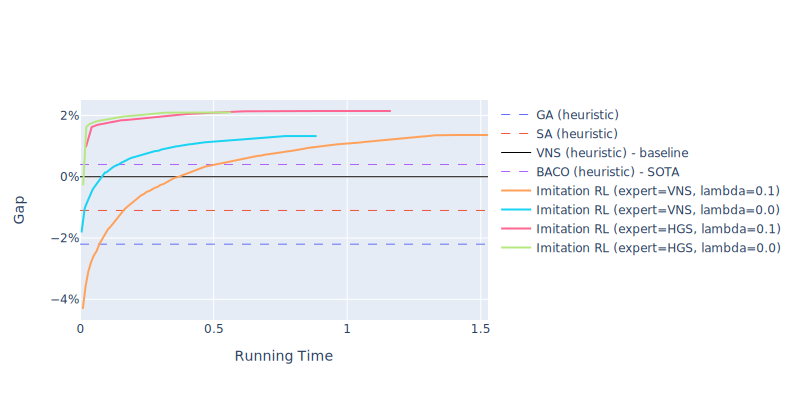

In [207]:
fig = go.Figure()
fig.add_scatter(x=[0, vns_running_time], y=[-0.022, -0.022], name="GA (heuristic)", mode="lines", line=dict(dash='dash', width=1))
fig.add_scatter(x=[0, vns_running_time], y=[-0.011, -0.011], name="SA (heuristic)", mode="lines", line=dict(dash='dash', width=1))
fig.add_scatter(x=[0, vns_running_time], y=[0, 0], name="VNS (heuristic) - baseline", mode="lines", line=dict(color='black', width=1))
fig.add_scatter(x=[0, vns_running_time], y=[0.004, 0.004], name="BACO (heuristic) - SOTA", mode="lines", line=dict(dash='dash', width=1))
fig.add_scatter(x=vns_gap["Running Time"], y=vns_gap["VNS gap"], name="Imitation RL (expert=VNS, lambda=0.1)", line=dict(width=2))
fig.add_scatter(x=vns_no_imitation_gap["Running Time"], y=vns_no_imitation_gap["VNS gap"], name="Imitation RL (expert=VNS, lambda=0.0)", line=dict(width=2))
fig.add_scatter(x=hgs_gap["Running Time"], y=hgs_gap["HGS gap"], name="Imitation RL (expert=HGS, lambda=0.1)", line=dict(width=2))
fig.add_scatter(x=hgs_no_imitation_gap["Running Time"], y=hgs_no_imitation_gap["HGS gap"], name="Imitation RL (expert=HGS, lambda=0.0)", line=dict(width=2))
fig.update_layout(xaxis_title="Running Time", xaxis_dtick=0.5, yaxis_title="Gap", yaxis_tickformat=",.0%", width=800, height=400)
fig.show("svg")

HGS (lambda=0.1) graphs


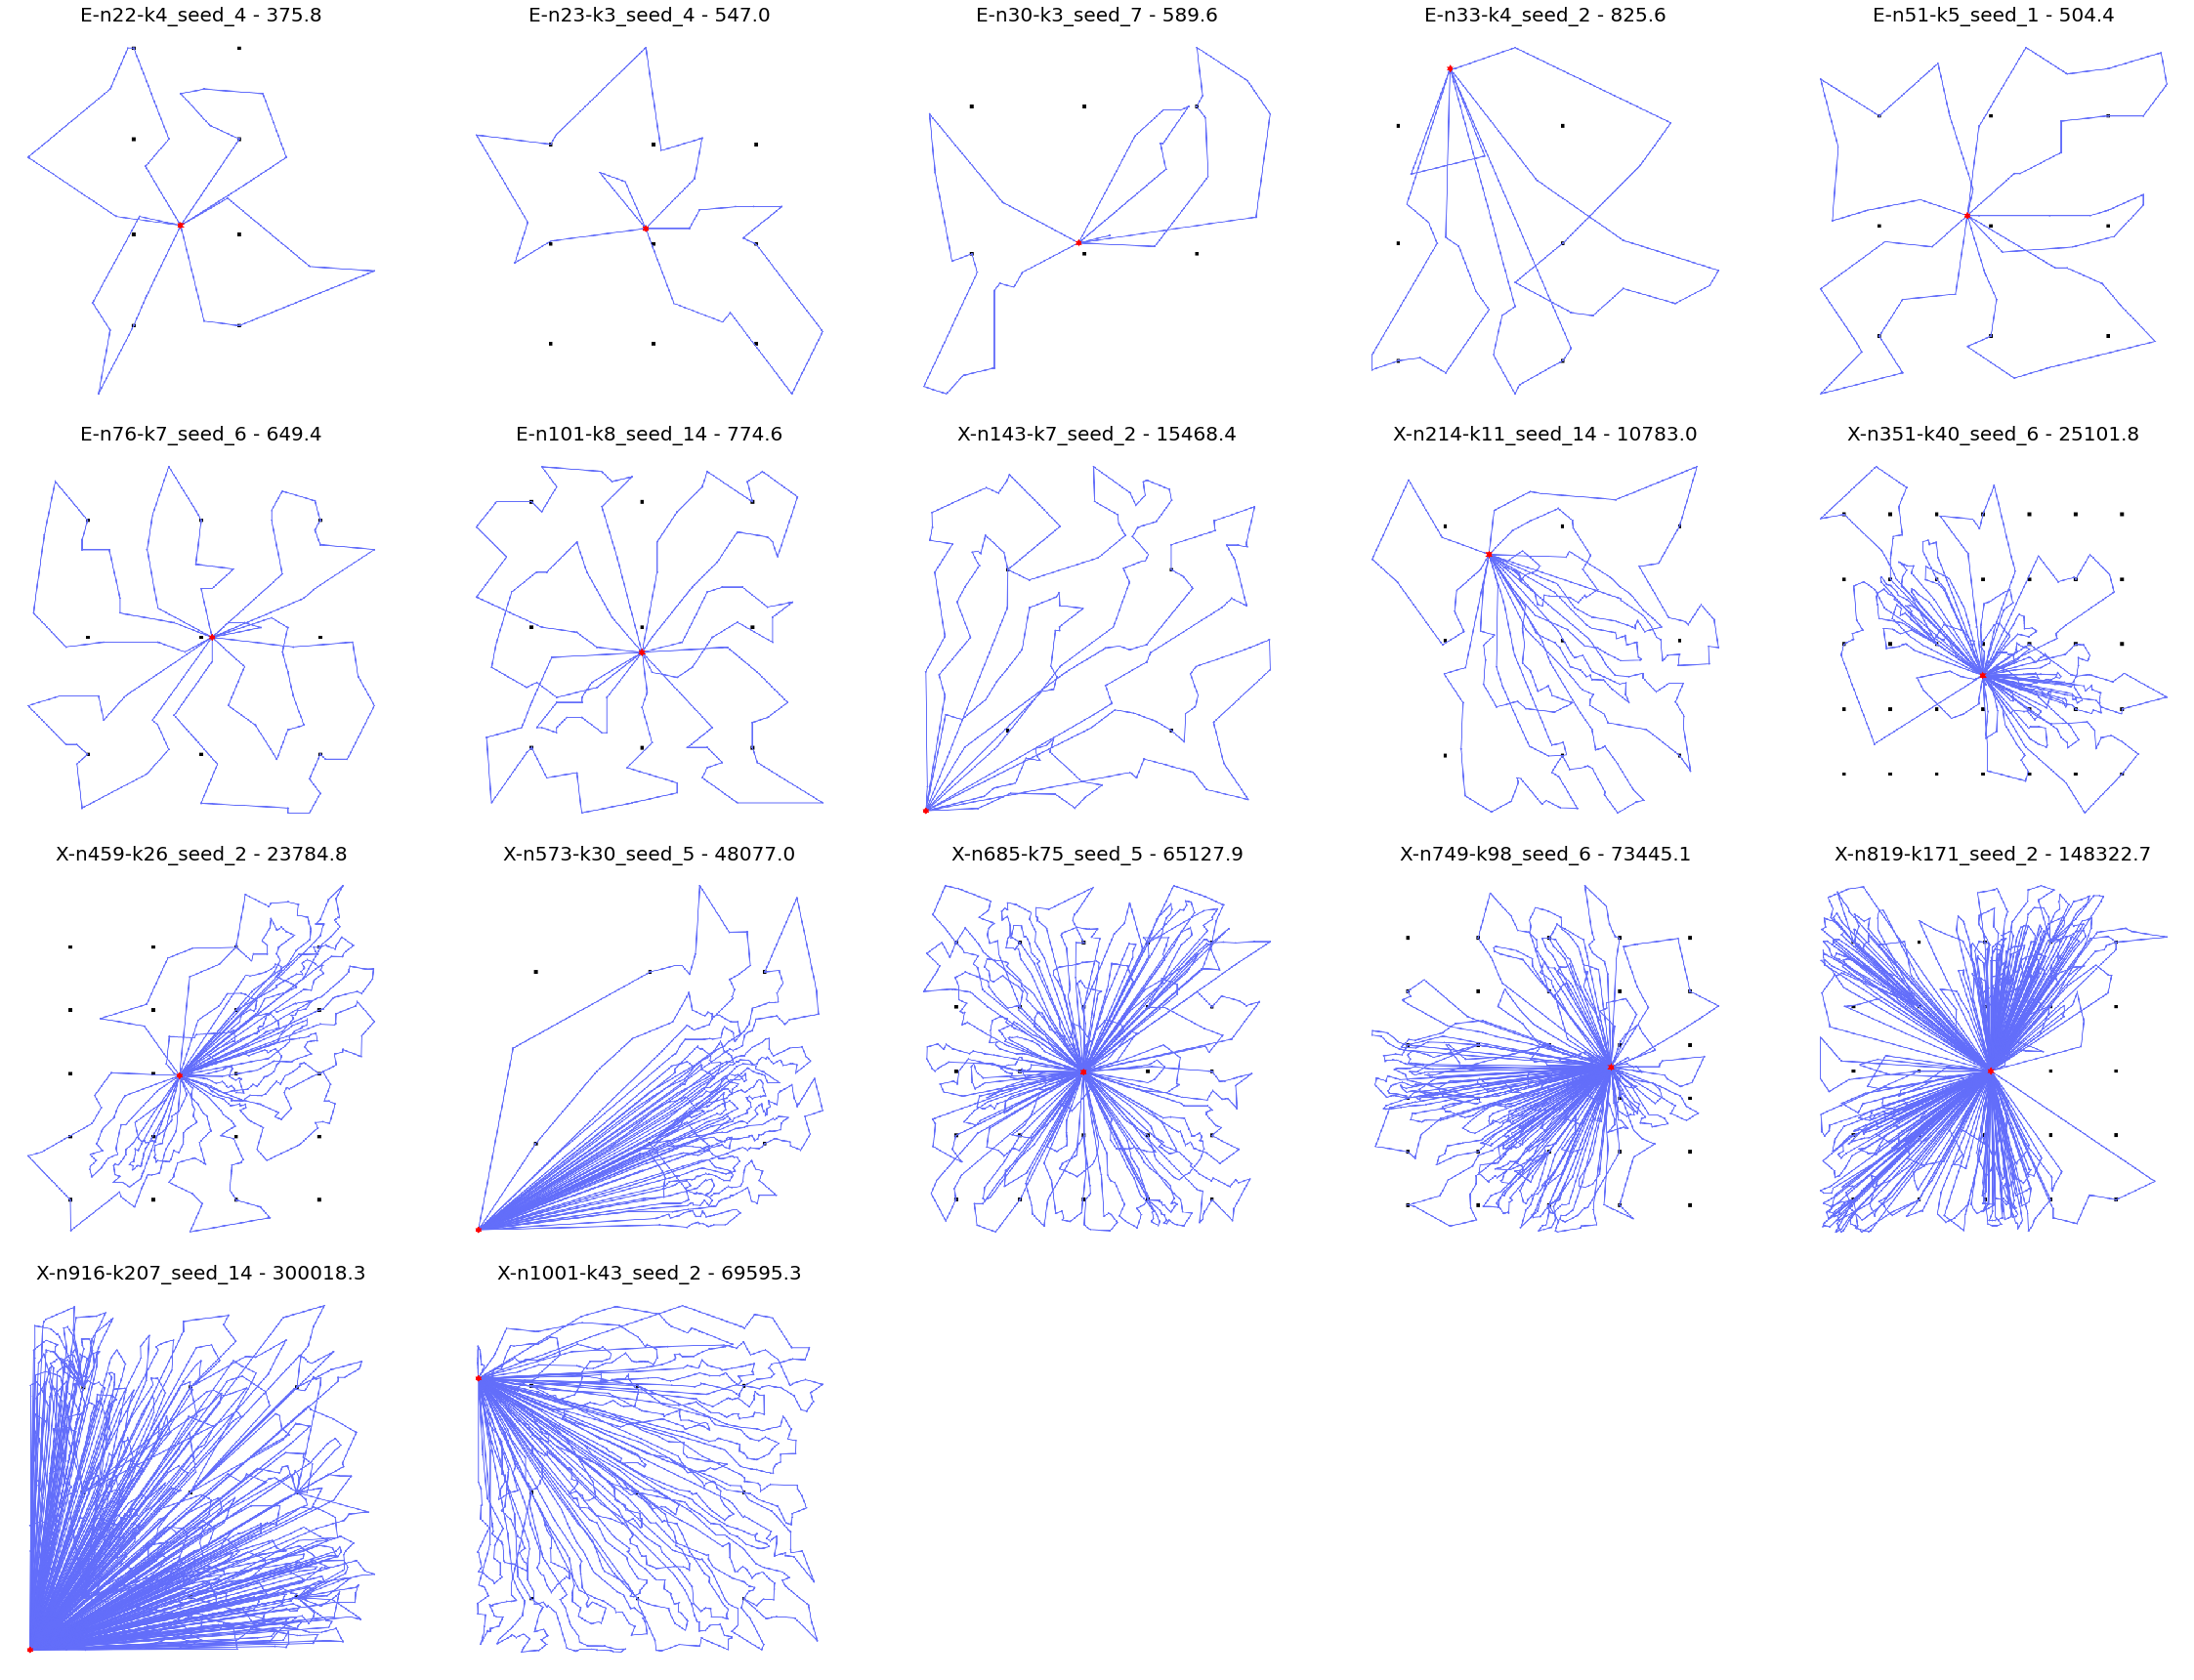

In [218]:
print("HGS (lambda=0.1) graphs")
os.makedirs("graphs/dataset_train_data_evrp_wcci_HGS_0.1", exist_ok=True)
fig = plt.figure(figsize=(32, 24))
for i, key in enumerate(instance_keys):
    plotly_fig, score, seed = instance_fig(vrp_hgs_best_score, key)
    img = plotly_fig2array(plotly_fig)
    plotly_fig.write_image(f"graphs/dataset_train_data_evrp_wcci_HGS_0.1/{key}.pdf")
    fig.add_subplot(4, 5, i+1)
    title = key.split(".")[0] + f"_{seed} - {score:.1f}"
    plt.title(title, fontsize=20)
    plt.imshow(img, interpolation='nearest')
    plt.axis('off')
fig.tight_layout()
plt.show("svg")

HGS (lambda=0.0) graphs


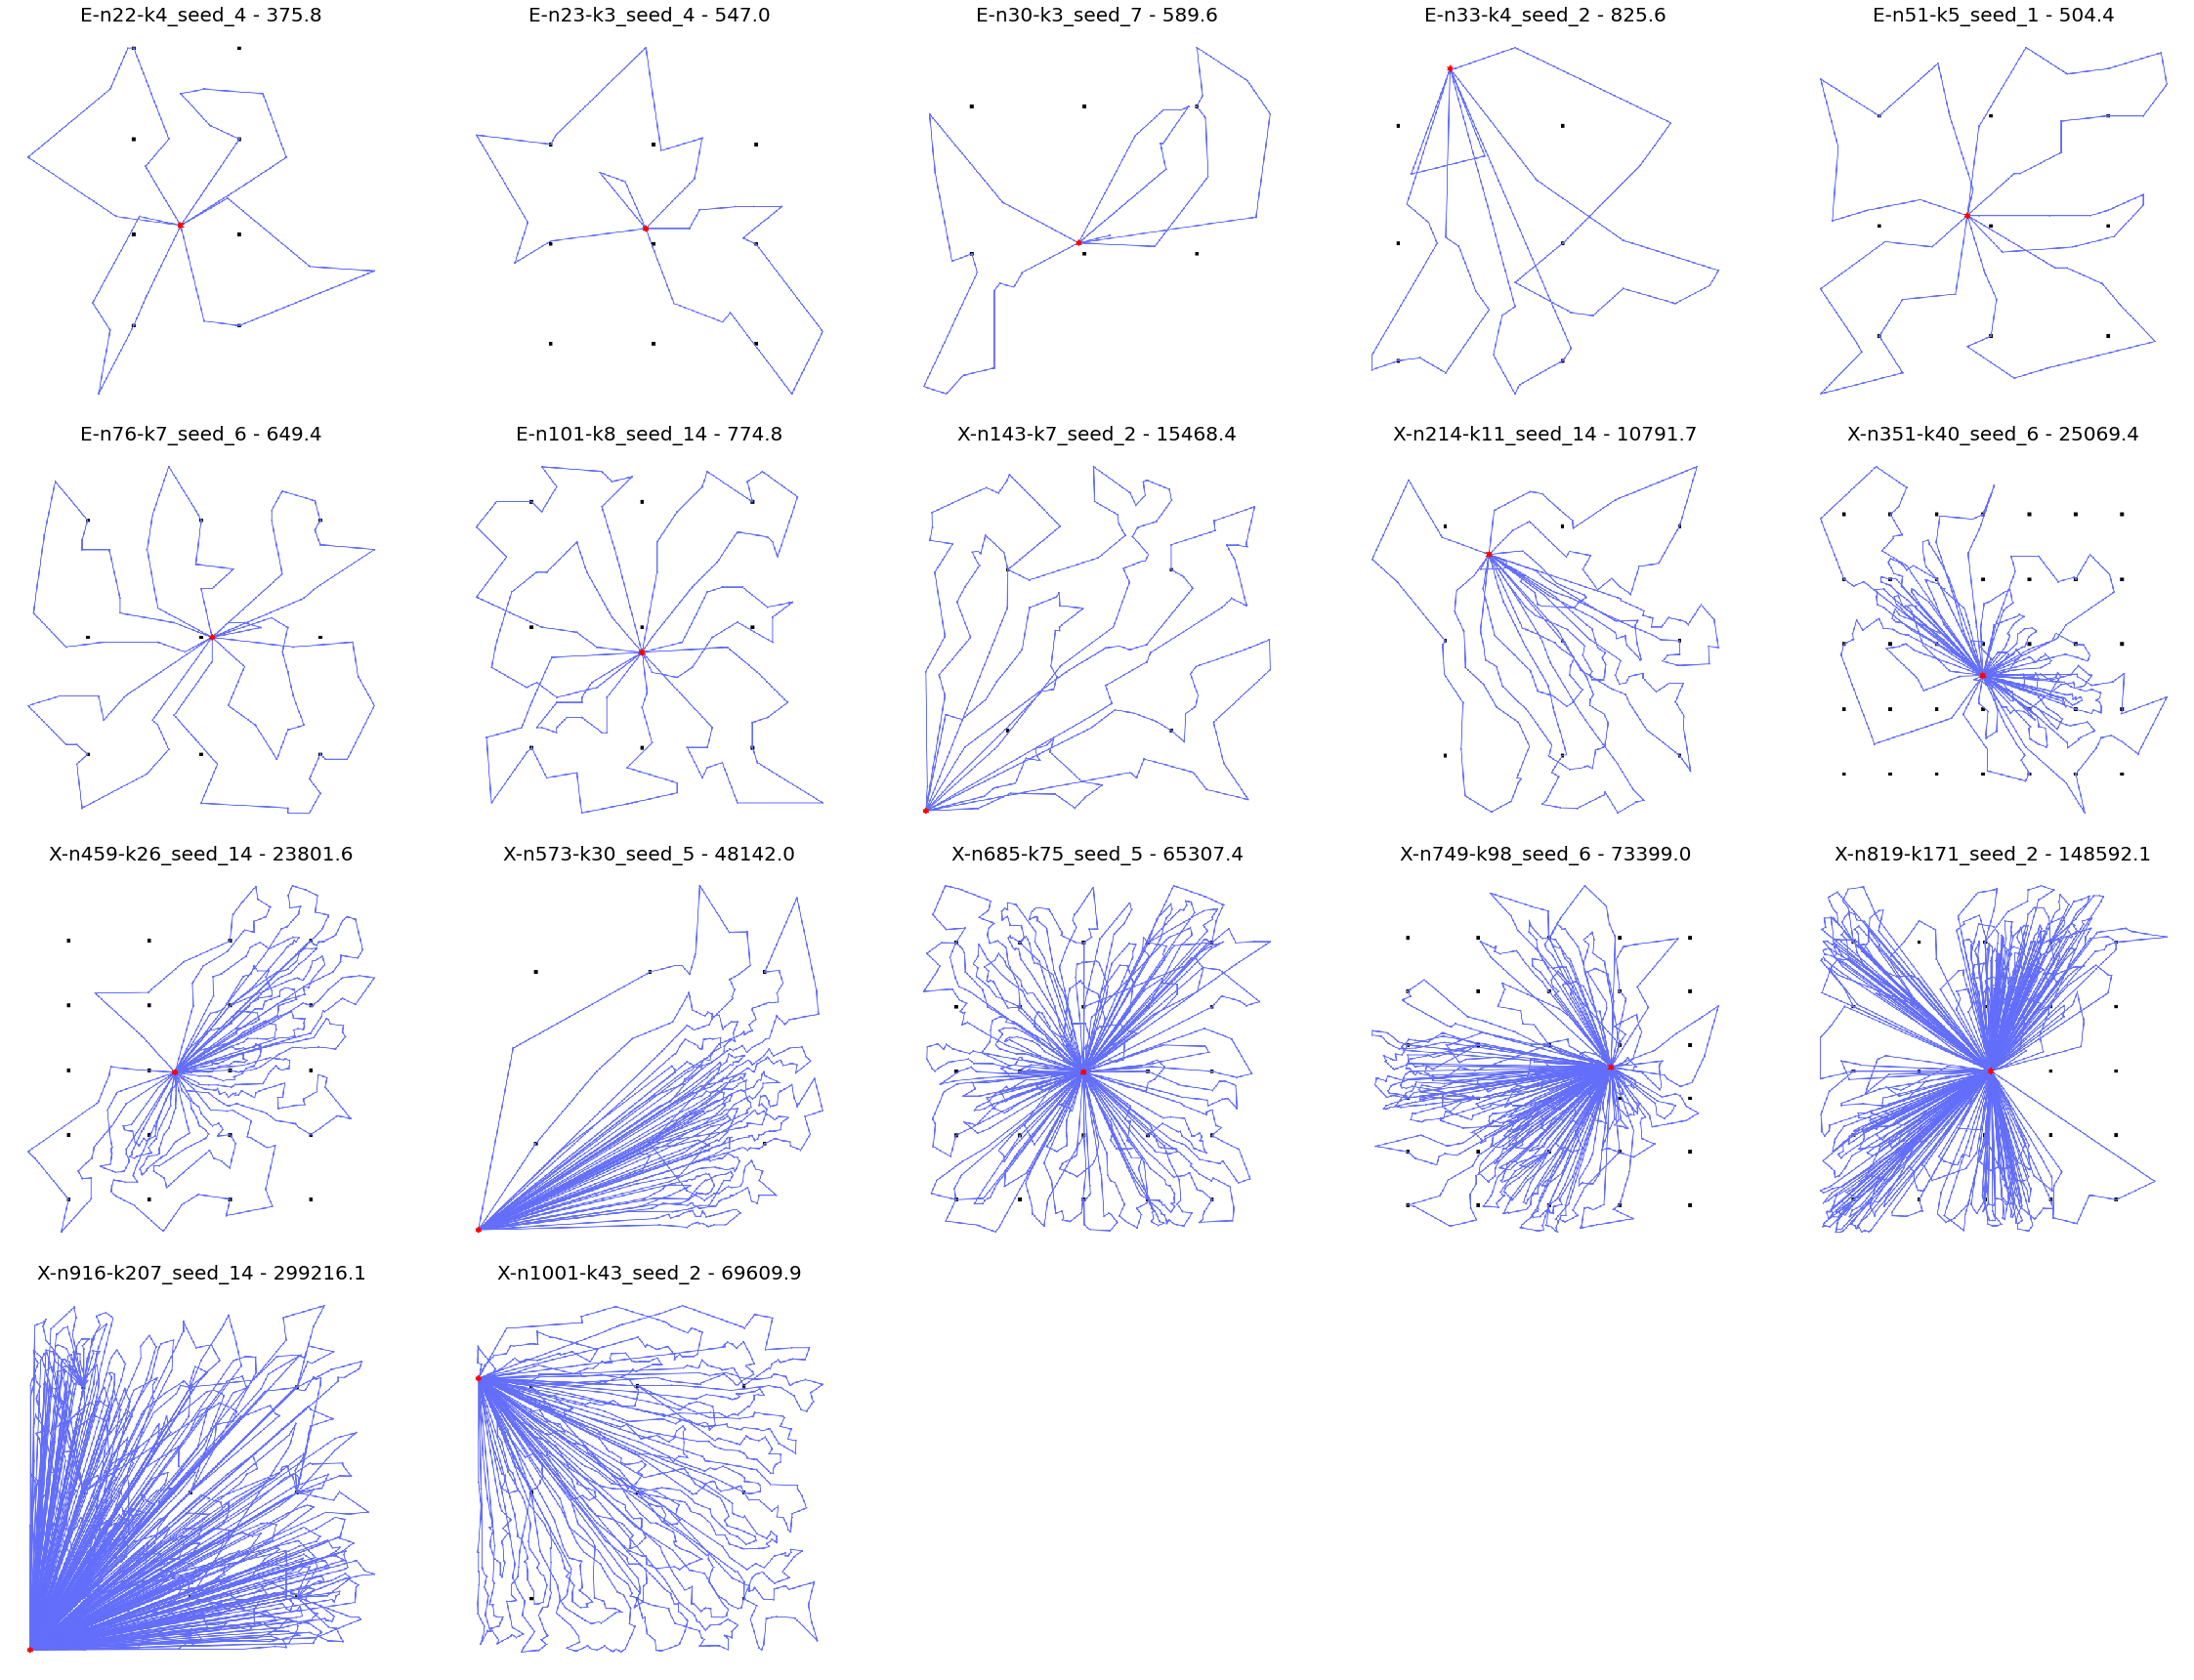

In [220]:
print("HGS (lambda=0.0) graphs")
os.makedirs("graphs/dataset_train_data_evrp_wcci_HGS_0.0", exist_ok=True)
fig = plt.figure(figsize=(32, 24))
for i, key in enumerate(instance_keys):
    plotly_fig, score, seed = instance_fig(vrp_hgs_no_imitation_best_score, key)
    img = plotly_fig2array(plotly_fig)
    plotly_fig.write_image(f"graphs/dataset_train_data_evrp_wcci_HGS_0.0/{key}.pdf")
    fig.add_subplot(4, 5, i+1)
    title = key.split(".")[0] + f"_{seed} - {score:.1f}"
    plt.title(title, fontsize=20)
    plt.imshow(img, interpolation='nearest')
    plt.axis('off')
fig.tight_layout()
plt.show("svg")

VNS (lambda=0.1) graphs


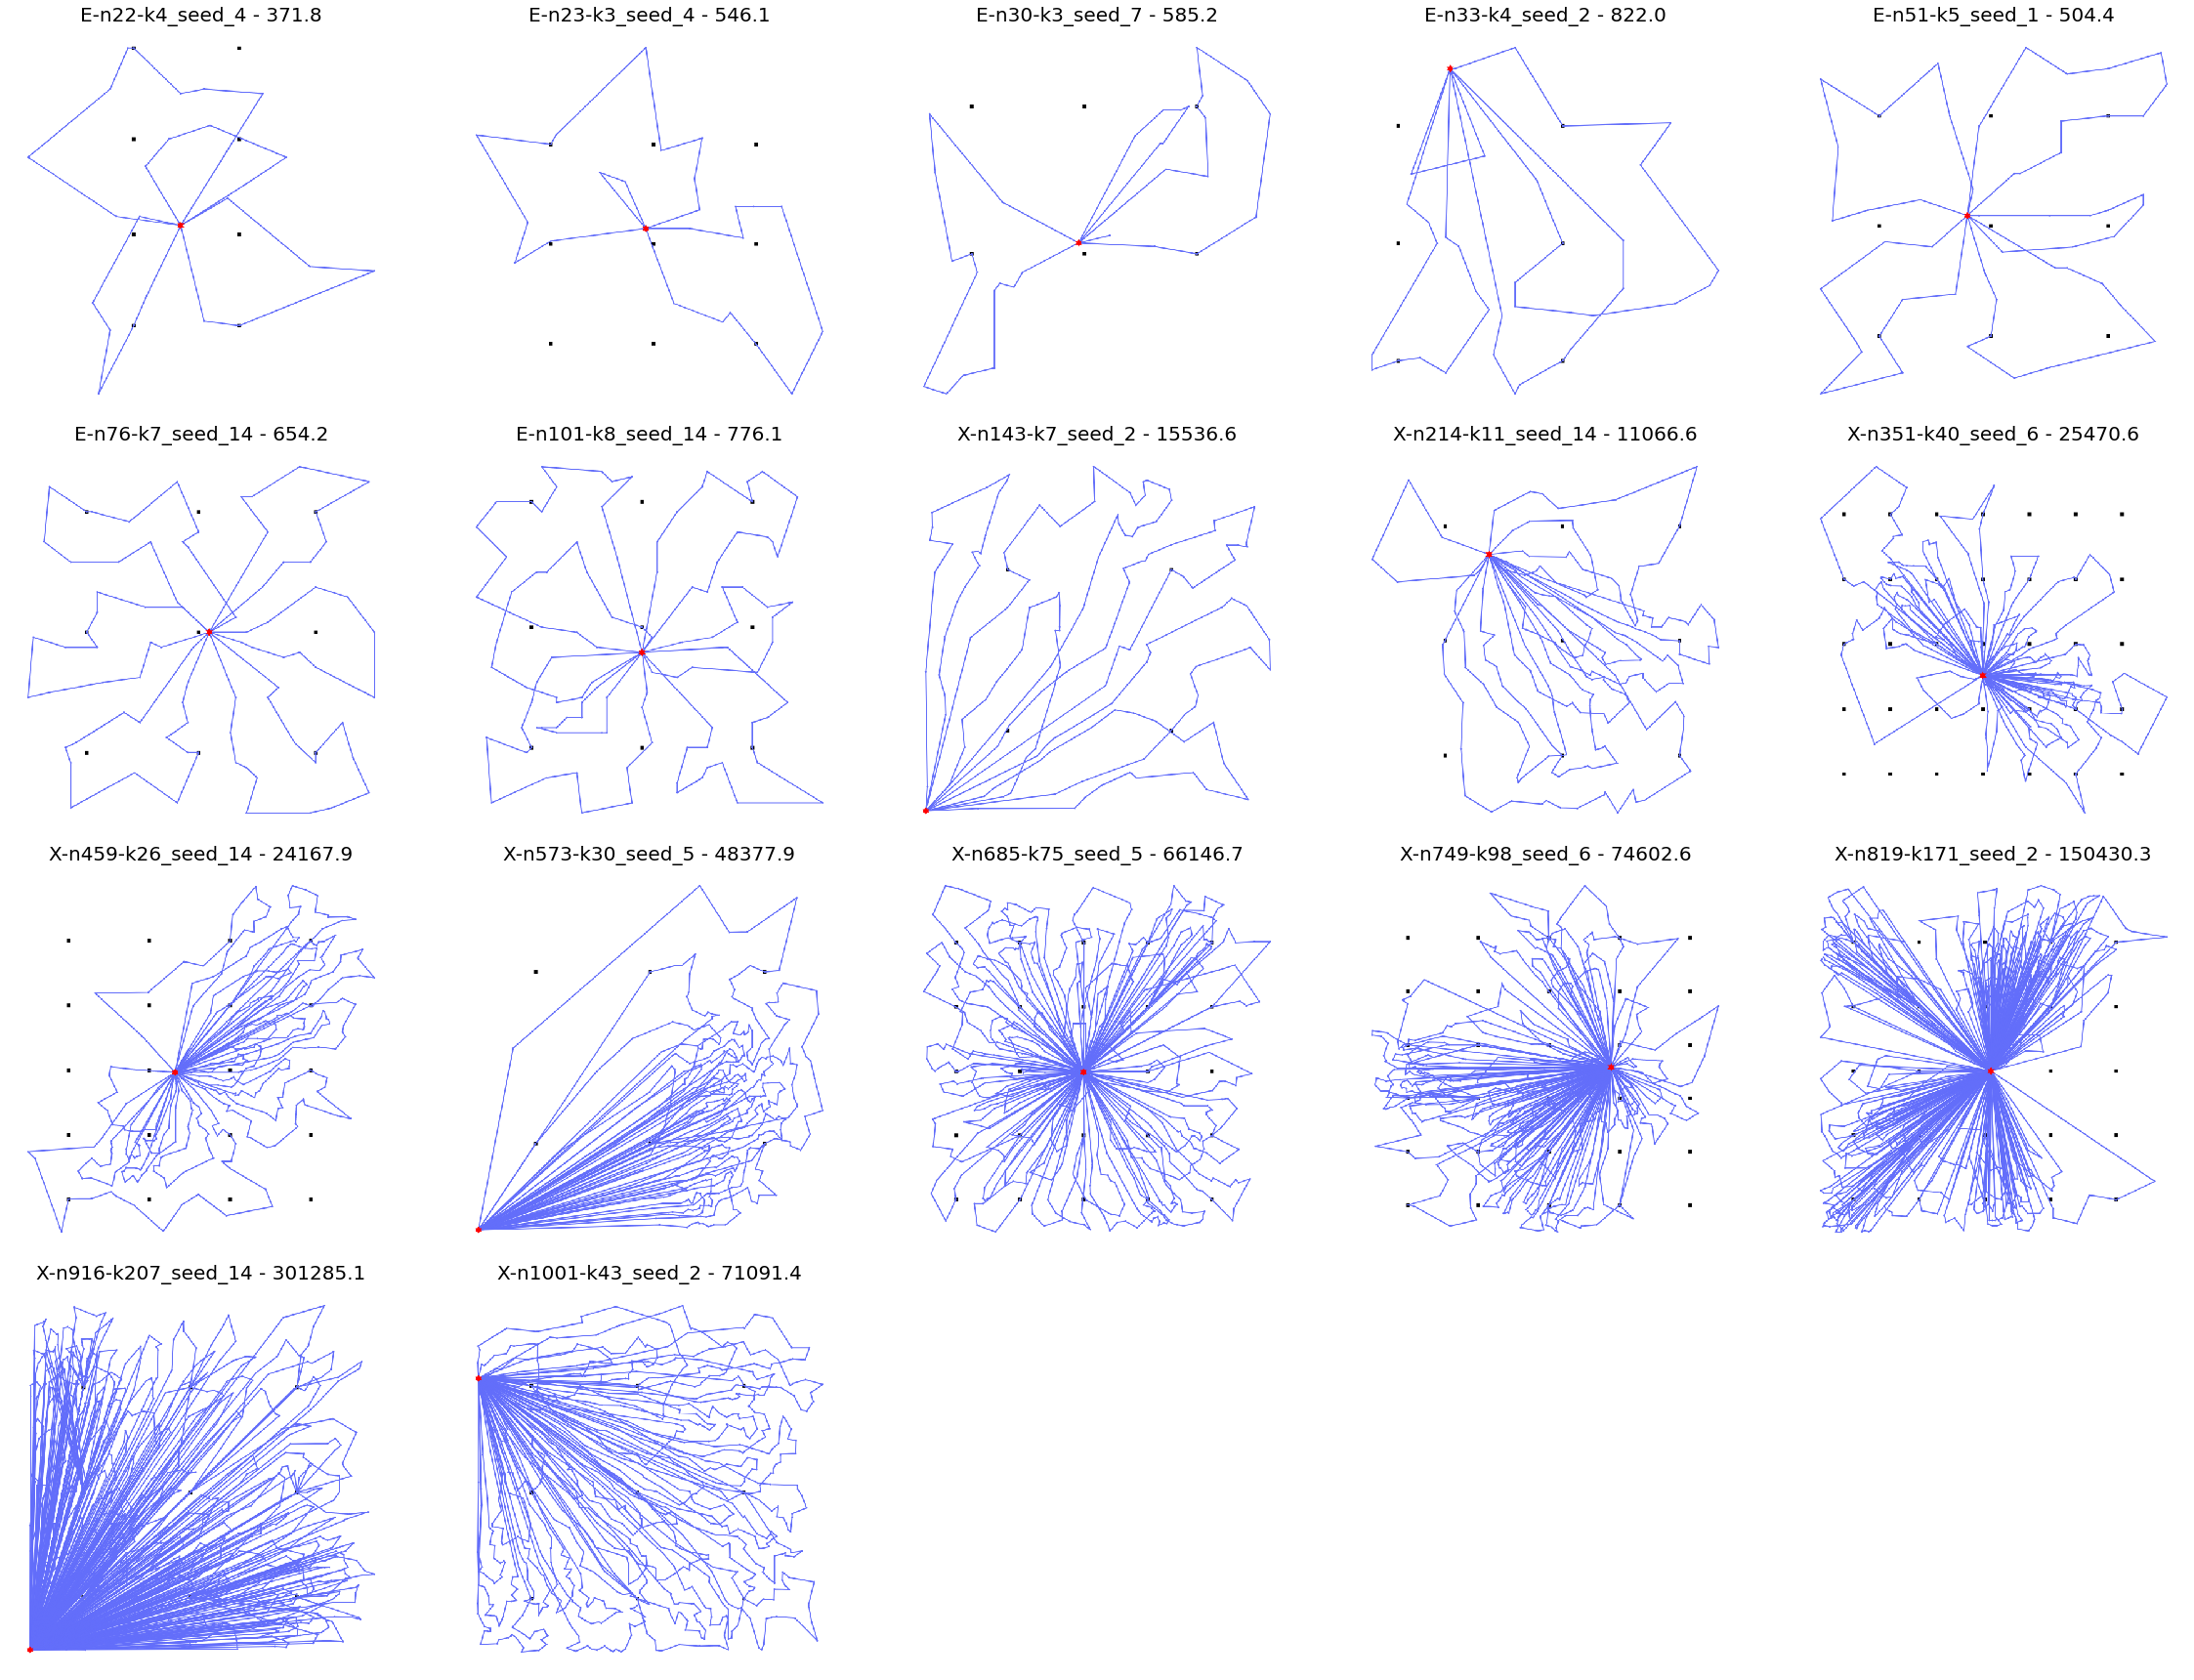

In [221]:
print("VNS (lambda=0.1) graphs")
os.makedirs("graphs/dataset_train_data_evrp_wcci_VNS_0.1", exist_ok=True)
fig = plt.figure(figsize=(32, 24))
for i, key in enumerate(instance_keys):
    plotly_fig, score, seed = instance_fig(vrp_vns_best_score, key)
    img = plotly_fig2array(plotly_fig)
    plotly_fig.write_image(f"graphs/dataset_train_data_evrp_wcci_VNS_0.1/{key}.pdf")
    fig.add_subplot(4, 5, i+1)
    title = key.split(".")[0] + f"_{seed} - {score:.1f}"
    plt.title(title, fontsize=20)
    plt.imshow(img, interpolation='nearest')
    plt.axis('off')
fig.tight_layout()
plt.show("svg")

VNS (lambda=0.0) graphs


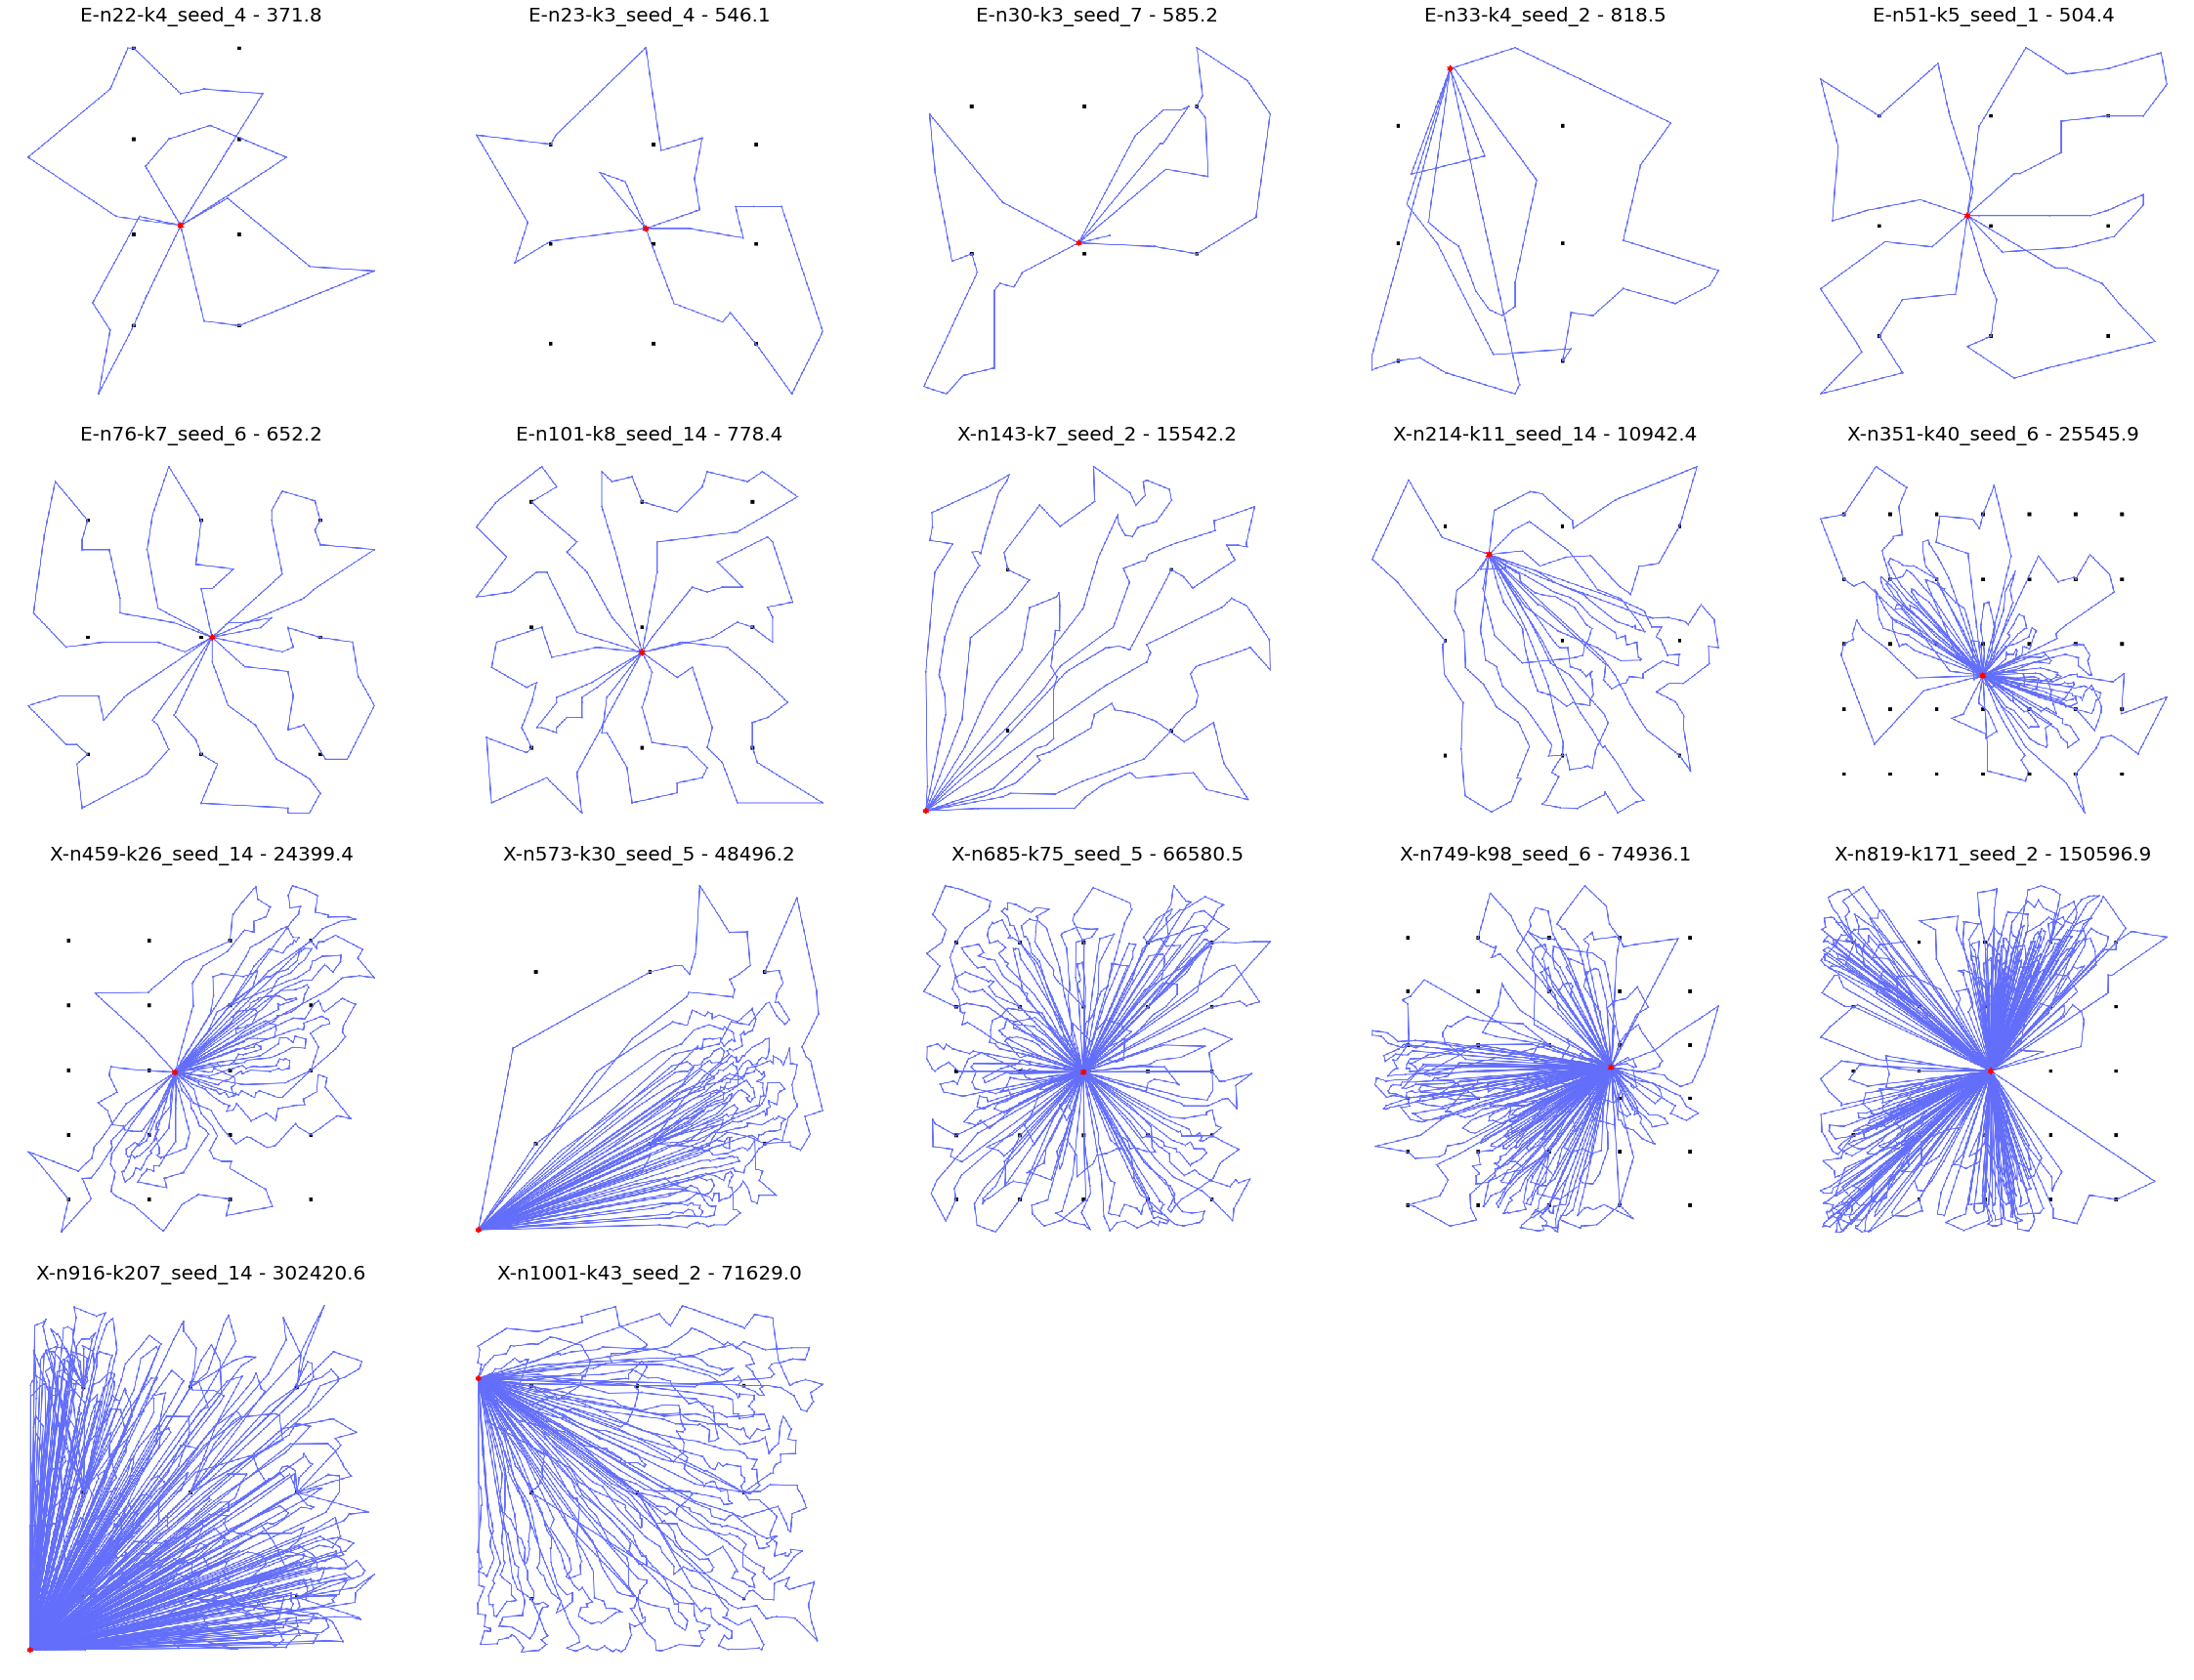

In [222]:
print("VNS (lambda=0.0) graphs")
os.makedirs("graphs/dataset_train_data_evrp_wcci_VNS_0.0", exist_ok=True)
fig = plt.figure(figsize=(32, 24))
for i, key in enumerate(instance_keys):
    plotly_fig, score, seed = instance_fig(vrp_vns_no_imitation_best_score, key)
    img = plotly_fig2array(plotly_fig)
    plotly_fig.write_image(f"graphs/dataset_train_data_evrp_wcci_VNS_0.0/{key}.pdf")
    fig.add_subplot(4, 5, i+1)
    title = key.split(".")[0] + f"_{seed} - {score:.1f}"
    plt.title(title, fontsize=20)
    plt.imshow(img, interpolation='nearest')
    plt.axis('off')
fig.tight_layout()
plt.show("svg")